## Image - Processing : Blurring

### 모듈 불러오기

In [2]:
import pandas as pd 
import numpy as np 
import cv2 
import sys 
import matplotlib.pyplot as plt 
from PIL import Image 

Text(0.5, 1.0, 'add_gamma_up')

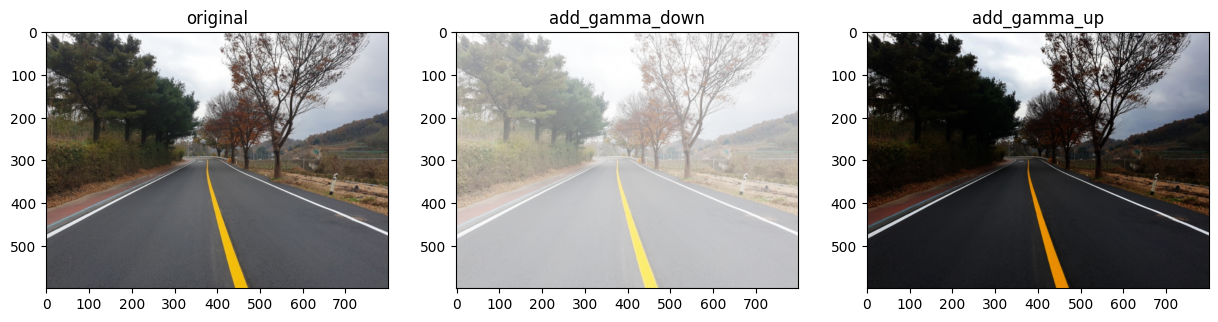

In [19]:
def load_img():
    img = cv2.imread('/home/kkyu/amr_ws/opencv/data/road.jpg').astype(np.float32) / 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (800,600))
    return img

plt.figure(figsize = (15,12))

fig = plt.subplot(1, 3, 1)
ori = load_img()
plt.imshow(ori)
plt.title('original')

fig = plt.subplot(1, 3, 2)
pic = load_img()
gamma = 1/4
result = np.power(pic, gamma)
plt.imshow(result)
plt.title('add_gamma_down')

fig = plt.subplot(1, 3, 3)
pi = load_img()
gamma = 2
result = np.power(pi, gamma)
plt.imshow(result)
plt.title('add_gamma_up')

    

Text(0.5, 1.0, 'bilateral Filter')

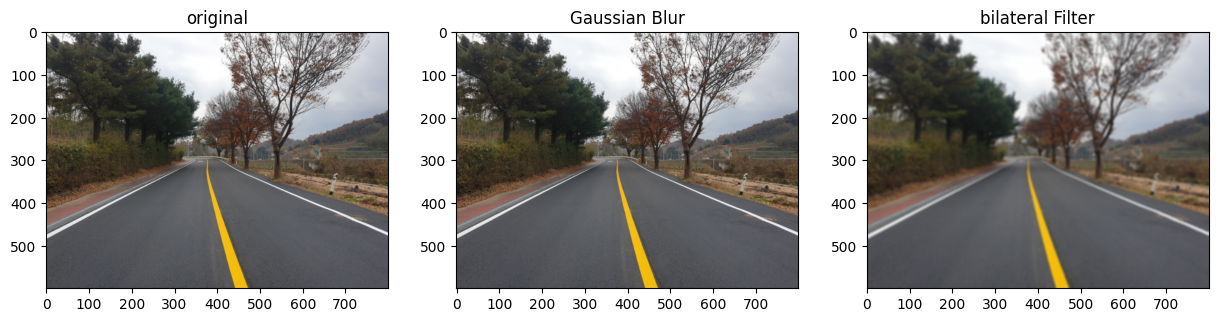

In [21]:
def load_img():
    img = cv2.imread('/home/kkyu/amr_ws/opencv/data/road.jpg').astype(np.float32) / 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (800,600))
    return img

plt.figure(figsize = (15,12))

fig = plt.subplot(1, 3, 1)
ori = load_img()
plt.imshow(ori)
plt.title('original')

fig = plt.subplot(1, 3, 2)
pic = load_img()
blurred_gaus = cv2.GaussianBlur(src = pic, ksize=(9,9), sigmaX=10)
plt.imshow(pic)
plt.title('Gaussian Blur')

fig = plt.subplot(1, 3, 3)
pi = load_img()
blur = cv2.bilateralFilter(pi,9,75,75)
plt.imshow(blur)
plt.title('bilateral Filter')

    

### 잡음 제거 -- cv2.medianBlur

In [23]:
src = cv2.imread('/home/kkyu/amr_ws/opencv/data/road.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    sys.exit()

dst = cv2.medianBlur(src,3)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

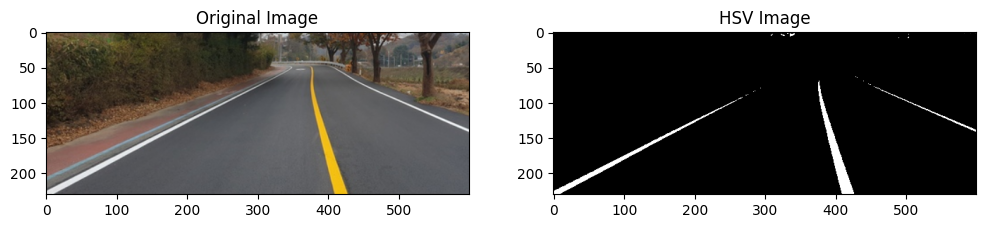

In [35]:
def load_img():
    img = cv2.imread('/home/kkyu/amr_ws/opencv/data/road.jpg', cv2.IMREAD_COLOR)
    img = cv2.resize(img, (800,600))
    ROI = img[250:480, 0:600]
    
    HSV = cv2.cvtColor(ROI, cv2.COLOR_BGR2HSV)
    
    lower_white = np.array([0, 0, 200], dtype=np.uint8) 
    upper_white = np.array([180, 255, 255], dtype=np.uint8) 
    white_mask = cv2.inRange(HSV, lower_white, upper_white) 

    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(white_mask, connectivity=8)
    
    return ROI, white_mask


ROI, white_mask = load_img()

plt.figure(figsize = (12,10))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(ROI, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(white_mask, cmap='gray')
plt.title('HSV Image')

plt.show()

